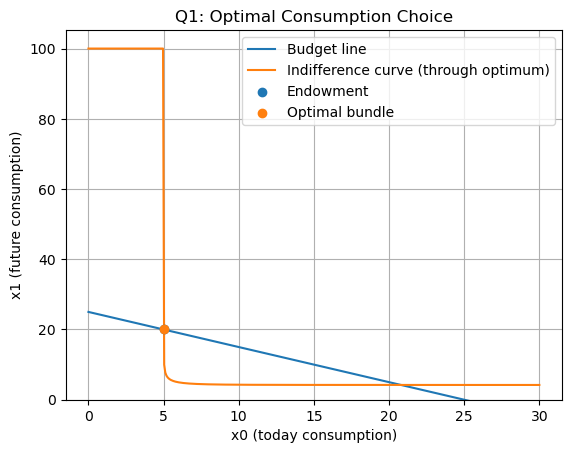

Optimal (x0*, x1*) = (5.0000, 20.0000)


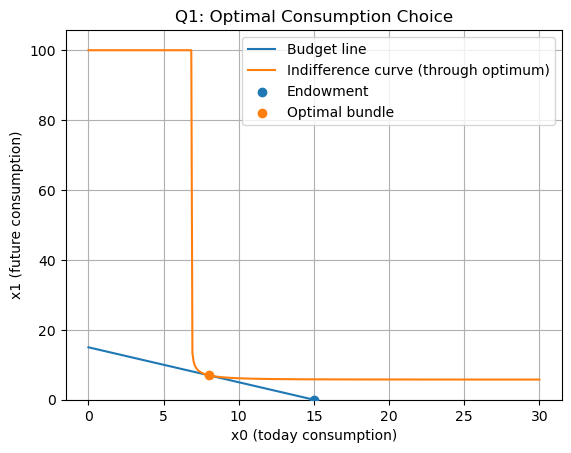

Optimal (x0*, x1*) = (8.0467, 6.9533)


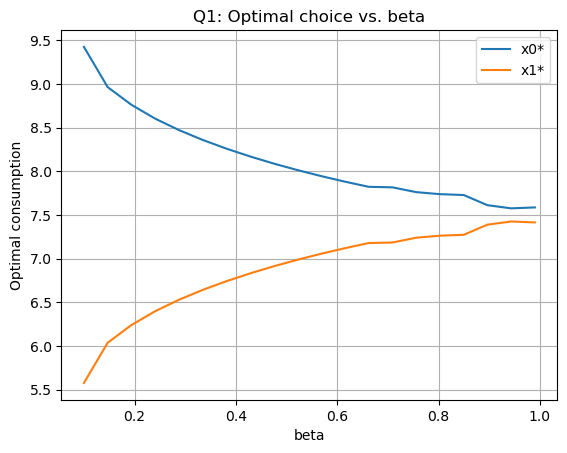

beta	 x0*		 x1*
0.10	 9.4237	 5.5763
0.15	 8.9634	 6.0366
0.19	 8.7611	 6.2389
0.24	 8.6027	 6.3973
0.29	 8.4720	 6.5280
0.33	 8.3591	 6.6409
0.38	 8.2592	 6.7408
0.43	 8.1695	 6.8305
0.47	 8.0878	 6.9122
0.52	 8.0130	 6.9870
0.57	 7.9442	 7.0558
0.62	 7.8806	 7.1194
0.66	 7.8218	 7.1782
0.71	 7.8158	 7.1842
0.76	 7.7609	 7.2391
0.80	 7.7378	 7.2622
0.85	 7.7279	 7.2721
0.90	 7.6115	 7.3885
0.94	 7.5753	 7.4247
0.99	 7.5858	 7.4142


In [1]:
### Niraj Neupane

## Financial Micro Economics

# ============================================================
# Q1 — Optimal Portfolio Choice (2-period consumption) + Plots
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ----------------------------
# 1) Model: CRRA utility + budget constraint
# ----------------------------
def crra_u(c, theta):
    c = np.maximum(c, 1e-12)
    if abs(theta - 1.0) < 1e-12:
        return np.log(c)
    return (c ** (1 - theta)) / (1 - theta)

def utility_2period(x0, x1, beta, theta):
    return crra_u(x0, theta) + beta * crra_u(x1, theta)

def solve_optimal_consumption(p0, p1, e0, e1, beta, theta):
    """
    max u(x0,x1) s.t. p0*x0 + p1*x1 = p0*e0 + p1*e1 and x0,x1 >= 0
    """
    income = p0*e0 + p1*e1

    def obj(x):
        x0, x1 = x
        return -utility_2period(x0, x1, beta, theta)

    cons = [{"type": "eq", "fun": lambda x: p0*x[0] + p1*x[1] - income}]
    bounds = [(1e-12, None), (1e-12, None)]
    x0_init = np.array([max(e0, 1.0), max(e1, 1.0)])

    res = minimize(obj, x0_init, bounds=bounds, constraints=cons)
    if not res.success:
        raise RuntimeError(res.message)

    return res.x[0], res.x[1], income

# ----------------------------
# 2) Plots: budget line + endowment + optimum + indifference curve
# ----------------------------
def plot_budget_endowment_optimum(p0, p1, e0, e1, beta, theta):
    x0_star, x1_star, income = solve_optimal_consumption(p0, p1, e0, e1, beta, theta)

    # Budget line
    x0_grid = np.linspace(1e-6, max(2*e0, 30), 400)
    x1_budget = (income - p0*x0_grid) / p1

    # Indifference curve through optimum: find x1 such that U(x0,x1)=U*
    U_star = utility_2period(x0_star, x1_star, beta, theta)
    x1_indiff = []
    for x0 in x0_grid:
        # Solve for x1 from utility equation (simple numeric)
        # Use monotonicity: increase x1 until utility crosses U_star
        lo, hi = 1e-10, max(2*e1 + 50, 100)
        for _ in range(60):
            mid = 0.5*(lo+hi)
            if utility_2period(x0, mid, beta, theta) < U_star:
                lo = mid
            else:
                hi = mid
        x1_indiff.append(0.5*(lo+hi))
    x1_indiff = np.array(x1_indiff)

    plt.figure()
    plt.plot(x0_grid, x1_budget, label="Budget line")
    plt.plot(x0_grid, x1_indiff, label="Indifference curve (through optimum)")
    plt.scatter([e0], [e1], label="Endowment", zorder=3)
    plt.scatter([x0_star], [x1_star], label="Optimal bundle", zorder=3)
    plt.xlabel("x0 (today consumption)")
    plt.ylabel("x1 (future consumption)")
    plt.title("Q1: Optimal Consumption Choice")
    plt.ylim(bottom=0)
    plt.grid(True)
    plt.legend()
    plt.show()

    print(f"Optimal (x0*, x1*) = ({x0_star:.4f}, {x1_star:.4f})")
    return x0_star, x1_star

# ----------------------------
# 3) (a) Baseline example (edit these as per your question)
# ----------------------------
p0, p1 = 1.0, 1.0
e0, e1 = 5.0, 20.0
beta, theta = 0.5, 5.0

plot_budget_endowment_optimum(p0, p1, e0, e1, beta, theta)

# ----------------------------
# 4) (c) Repeat for endowment (15,0)
# ----------------------------
e0, e1 = 15.0, 0.0
plot_budget_endowment_optimum(p0, p1, e0, e1, beta, theta)

# ----------------------------
# 5) (d,e) How optimal choice varies with beta (plot + table)
# ----------------------------
def beta_sweep_plot(p0, p1, e0, e1, theta, betas):
    x0s, x1s = [], []
    for b in betas:
        x0_star, x1_star, _ = solve_optimal_consumption(p0, p1, e0, e1, b, theta)
        x0s.append(x0_star)
        x1s.append(x1_star)

    plt.figure()
    plt.plot(betas, x0s, label="x0*")
    plt.plot(betas, x1s, label="x1*")
    plt.xlabel("beta")
    plt.ylabel("Optimal consumption")
    plt.title("Q1: Optimal choice vs. beta")
    plt.grid(True)
    plt.legend()
    plt.show()

    print("beta\t x0*\t\t x1*")
    for b, x0, x1 in zip(betas, x0s, x1s):
        print(f"{b:.2f}\t {x0:.4f}\t {x1:.4f}")

betas = np.linspace(0.10, 0.99, 20)
beta_sweep_plot(p0, p1, 15.0, 0.0, theta=5.0, betas=betas)

# ----------------------------
# Suggestions (optional):
# - Add borrowing/lending interest rate: p1 = 1/(1+r), p0=1
# - Add constraint x0 <= e0 (no borrowing) if your question requires it
# - Add sensitivity to theta (risk aversion) like we did for beta
# ----------------------------
